# Supporting code to generate results included in the `Quantifying participation biases on social media` paper.

The following code generates Figure 8 in the paper.

In [1]:
%run Utilities.ipynb

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import dirichlet,beta,bernoulli,multinomial,uniform,norm,invgamma
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(color_codes=True)
sns_c = sns.color_palette(palette='deep')
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=3)

In [8]:
tw_index = ['pg61','pg62','pg63','pg64','pg65','pg66','sept_2019','feb_2020']

In [2]:
tw_alphacols = ['dem-men','dem-women','rep-men','rep-women']

In [12]:
# response rates from surveys
tw_df = pd.DataFrame(np.array([
    [0.92,0.94,0.49,0.65],
    [0.87,0.92,0.50,0.67],
    [0.87,0.84,0.32,0.49],
    [0.82,0.89,0.24,0.52],
    [0.67,0.71,0.17,0.29],
    [0.82,0.87,0.34,0.42],
    [0.86,0.92,0.20,0.26],
    [0.83,0.89,0.28,0.25]
]),index=tw_index,columns=tw_alphacols)

In [13]:
# estimates for target (y)
tw_df['y'] = np.array([0.6990,0.5742,0.5468,0.5699,0.6532,0.6461,0.4930,0.4274])
tw_df['y_var'] = np.array([0.0458,0.0800,0.0859,0.0611,0.1106,0.0267,0.0360,0.0736]) 

In [14]:
tw_df

,dem-men,dem-women,rep-men,rep-women,y,y_var
pg61,0.92,0.94,0.49,0.65,0.6990,0.0458
pg62,0.87,0.92,0.50,0.67,0.5742,0.0800
pg63,0.87,0.84,0.32,0.49,0.5468,0.0859
pg64,0.82,0.89,0.24,0.52,0.5699,0.0611
pg65,0.67,0.71,0.17,0.29,0.6532,0.1106
pg66,0.82,0.87,0.34,0.42,0.6461,0.0267
sept_2019,0.86,0.92,0.20,0.26,0.4930,0.0360
feb_2020,0.83,0.89,0.28,0.25,0.4274,0.0736


- `pvar` - sets the impact of the prior for the `p()` distribution. Lower value means that the impact of the prior will be low.

In [15]:
tw_qvar,tw_pvar = 5,2

In [16]:
tw_prior_sm_dem_dist = np.array([1/len(tw_alphacols)]*len(tw_alphacols))

In [18]:
# this is set based on domain knowledge (distributions from Pew, etc.)
pprior = np.array([0.312,0.312,0.188,0.188])

In [23]:
res_post = []
res_post_var = []
for i in range(100):
    tw_w,tw_var,tw_post_w,tw_post_var = runInfExptFixed(tw_df,
                                                        tw_prior_sm_dem_dist,tw_qvar,tw_pvar,tw_alphacols,
                                                        pprior=pprior)
    res_post.append(tw_post_w)
    res_post_var.append(tw_post_var)

In [24]:
# least square estimates
tw_w

array([ 0.358618  ,  0.21547411, -0.40694113,  0.48235448])

In [25]:
def plotPart(ax,ylevels,pre,post,yticklabels,ylims,offspine):
    ax.scatter(post,ylevels,c='black',s=200)
    ax.scatter(pre,ylevels,c='cornflowerblue',s=200)
    #ax.legend(['Twitter (Guns)','Twitter (All)'],loc='upper left',ncol=2)


    for i in range(len(ylevels)):
        ax.plot([pre[i],post[i]],[ylevels[i],ylevels[i]],c='gray',alpha=0.3,linewidth=16)
        if (post[i] < pre[i]):
            xytext = (8,0)
            ha = 'left'
            xytext1 = (-8,0)
            ha1 = 'right'
        else:
            xytext = (-8,0)
            ha = 'right'
            xytext1 = (8,0)
            ha1 = 'left'
        ax.annotate('{:.2f}'.format(pre[i]),
                           xy=(pre[i],ylevels[i]),
                           xytext=xytext,
                           textcoords="offset points",color='cornflowerblue',
                           ha=ha, va='center',size=24)
        ax.annotate('{:.2f}'.format(post[i]),
                       xy=(post[i],ylevels[i]),
                       xytext=xytext1,
                       textcoords="offset points",color='black',
                       ha=ha1, va='center',size=24)


    ax.set_yticks(ylevels)
    ax.set_yticklabels(yticklabels)
    ax.set_xlim([-0.05,0.7])
    ax.set_ylim(ylims)
    ax.set_xticks([])
    ax.grid(b=None)
    ax.spines[offspine].set_visible(False)

<Figure size 432x288 with 0 Axes>

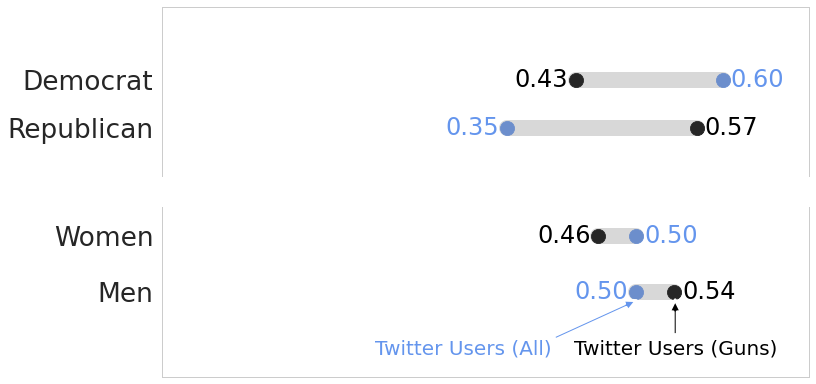

In [29]:
fig = plt.figure()
ax = plt.subplots(2,1,figsize=(12,6))

ylevels = np.array([1,2])
post=np.array([0.57,0.43])
pre=np.array([0.35,0.60])
plotPart(ax[1][0],ylevels,pre,post,['Republican','Democrat'],[0,3.5],'bottom')

ylevels = np.array([2,3])
post=np.array([0.544,0.456])
pre=np.array([0.50,0.50])
plotPart(ax[1][1],ylevels,pre,post,['Men','Women'],[0.5,3.5],'top')

ax[1][1].annotate('Twitter Users (All)', xy =(.5, 1.85),
                xytext =(.3, 1), size=20,ha='center',va='center',color='cornflowerblue',
                arrowprops = dict(facecolor ='cornflowerblue',lw=3),
                 )
ax[1][1].annotate('Twitter Users (Guns)', xy =(.545, 1.9),
                xytext =(.545, 1), size=20,color='black',ha='center',va='center',
                arrowprops = dict(facecolor ='black',lw=3,shrink = 0.05)
                 )


plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()
